In [4]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Homework 5 from Martin Gräf and Richard Baumann

In this homework we look at a Multigrid simulation of the Gaussian model. A hamiltonian for that problem is given by:

\begin{equation}
    H_a=\frac{1}{a}\sum_{i=1}^N(u_i-u_{i-1})^2.
\end{equation}

We also use the Dirichlet boundary conditions, which state:

\begin{equation}
    u(0)=u_0=0,
\end{equation}
\begin{equation}
    u(L)=u_N=0.
\end{equation}

This Hamiltonian is implemented below:

In [5]:
def Hamiltonian(u_array, a):
    sum=0

    # Dirichlet boundary condition (u_0 = 0)
    sum += (u_array[1] - 0)**2

    # The middle is normal (u_i − u_(i−1))**2
    for i in range(2, len(u_array)-2):
        sum += (u_array[i] - u_array[i-1])**2

    # Dirichlet boundary condition (u_N = 0)
    sum += (0 - u_array[len(u_array)-1])**2

    return (sum/a)

The value for the magnetization is given as:

\begin{equation}
    m=\frac{a}{L}\sum^{N-1}_{i=1} u_i
\end{equation}

And naturally the value for the squared magnetization is given as:

\begin{equation}
    m^2 =\frac{a^2}{L^2}\sum^{N-1}_{i=1} u_i^2
\end{equation}


In [6]:
def magnetization(u_array, a):
    sum = 0
    # Just summing over all u`s as stated above
    for i in range(1, len(u_array)-1):
        sum += u_array[i]

    # The final result is (L/a)*sum
    return (sum/len(u_array))

def magnetization_squared(u_array, a):
    sum = 0
    # The same as above just for the 
    # squared value of the magnetization
    for i in range(1, len(u_array)-1):
        sum += u_array[i]**2

    # The final result is (L/a)*sum
    return (sum/len(u_array))

The partition sum for the system is given by:

\begin{equation}
    Z(\beta, N, a)= \prod_{i=1}^{N-1} \int_{-\inf}^{\inf} du_i e^{-\beta H_a(u)}
\end{equation}

Furthermore the expectation value of a observable is given by:

\begin{equation}
    <o>=\frac{1}{Z} \int du \text{ } o \cdot e^{-\beta H}
\end{equation}

We can use the fourier decomposition:

\begin{equation}
    u_l= \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi a}{L} \right),
\end{equation}

to rewrite the hamiltonian to:

\begin{equation}
    H_a= \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right),
\end{equation}

## 1: Based on the above Fourier decomposition determine the analytic formula for the expectation value 1 of:

* the magnetization
* its square m
* the energy

As stated before, the magnetization is defined as:

\begin{equation}
    m=\frac{a}{L}\sum^{N-1}_{i=1} u_i
\end{equation}

With the fourier decomposition this becomes:

\begin{equation}
    m=\frac{a}{L}\sum^{N-1}_{i=1} u_i = \frac{a}{L} \sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi a}{L} \right) = \frac{a}{L} \sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi }{N} \right)
\end{equation}

Here we can use the identity, that was given on the exercise sheet:

\begin{equation}
    \sum^{N-1}_{i=1} c_k \sin \left(i \frac{k \pi }{N} \right)=\left\{
        \begin{array}{ll}
		0 , &\text{ if k even} \\
		\cot \left( \frac{k \pi}{2N} \right),& \text{ if k odd} 
		\end{array}
        \right.
\end{equation}

We can write:

\begin{equation}
    \frac{a}{L} \sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi }{N} \right) = \frac{a}{L} \sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i      \frac{k \pi }{N} \right) = \frac{a}{L} \sum^{N-1}_{k=1} c_k \sum^{N-1}_{i=1} \sin \left(i \frac{k \pi }{N} \right)= \frac{a}{L} \sum^{N-1}_{k=1} c_k \left\{
        \begin{array}{ll}
		0 , &\text{ if k even} \\
		\cot \left( \frac{k \pi}{2N} \right),& \text{ if k odd} 
		\end{array}
        \right. 
\end{equation} 

Putting that in the prior derived formula for an expected value we get:

\begin{equation}
    <m>=\frac{1}{Z} \int du \text{ } m \cdot e^{-\beta H} = \frac{1}{Z} \int du \text{ } e^{-\beta \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right)} \frac{a}{L} \sum^{N-1}_{k=1} c_k \left\{
        \begin{array}{ll}
		0 , &\text{ if k even} \\
		\cot \left( \frac{k \pi}{2N} \right),& \text{ if k odd} 
		\end{array}
        \right. 
\end{equation}

A relation, that can be used to simplefy the result is:

\begin{equation}
    \int_{\infty}^{\infty} dc \text{ } c \text{ } e^{-\frac{c^2}{2\sigma^2}} = 0
\end{equation}


For the squared magnetization we can see:

\begin{equation}
    m^2 =\frac{a}{L}\sum^{N-1}_{i=1} u_i^{2}
\end{equation}

We can again introduce the fourier decomposition:

\begin{equation}
    m^2 =\frac{a^2}{L^2}\sum^{N-1}_{i=1} u_i^{2} = \frac{a^2}{L^2}\sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi }{N}\right) \sum^{N-1}_{l=1} c_l \sin \left(i \frac{l \pi }{N}\right) = \frac{a^2}{L^2} \sum^{N-1}_{k=1} c_k \sum^{N-1}_{l=1} c_l \sum^{N-1}_{i=1} \sin \left(i \frac{k \pi }{N}\right) \sin \left(i \frac{l \pi }{N}\right)
\end{equation}

This can be simplefied using a given identity:

\begin{equation}
    \sum_{i=1}^{N-1} \sin \left(i \frac{k \pi }{N}\right) \sin \left(i \frac{l \pi }{N}\right) = \frac{N}{2} \delta_{k, l}
\end{equation}

Putting this in our equation we get:

\begin{equation}
    m^2 = \frac{a^2}{L^2}\sum^{N-1}_{i=1} \sum^{N-1}_{k=1} c_k \sin \left(i \frac{k \pi }{N}\right) \sum^{N-1}_{l=1} c_l \sin \left(i \frac{l \pi }{N}\right) = \frac{a^2}{L^2} \sum^{N-1}_{k=1} c_k \sum^{N-1}_{l=1} c_l \frac{N}{2} \delta_{k, l} = \frac{Na^2}{2L^2} \sum^{N-1}_{k=1} c_k^2
\end{equation}


Therefore, for the expectation value, we get:

\begin{equation}
    <m^2>=\frac{1}{Z} \int du \text{ } \frac{Na^2}{2L^2} \sum^{N-1}_{k=1} c_k^2 \cdot e^{-\beta \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right)}
\end{equation}


Finallay the expected value for the energy can be calculated by taking the already fourier decomposed Hamiltonian:

\begin{equation}
    H_a= \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right),
\end{equation}

Therefore the expected value for the energy becomes:

\begin{equation}
    <E>=\frac{1}{Z} \int du \text{ } \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right) \cdot e^{-\beta \frac{2N}{a}\sum^{N-1}_{k=1} c_k^2 \sin^2 \left(i \frac{k \pi }{2N} \right)}
\end{equation}

## 2: Implement the above version of the Metropolis-Hastings sweep. Test your algorithm by sampling with $\delta$ = 2., N = 64, $\beta$ = 1. Perform a measurement of the magnetization and energy after each sweep. Compare to the analytic results for the expectation values.

In [7]:
def metropolis_hastings(u_array, delta):

    # Make a copy of the u_array to do the update, 
    # but keep the original array
    u_array_temp=u_array

    # The position of the update is determined
    # ({1, ..., N-1})
    position=rd.randint(0, len(u_array_temp)-2)

    # Calculate the energy before the update
    energy_before=Hamiltonian(u_array_temp, 1)

    # Do the update: u'(x)=u(x)+\delta*r
    # where r is a random number between -1 and 1.
    u_array_temp[position]=u_array_temp[position]+rd.uniform(-1, 1)*delta

    # Now calculate the energy after the update
    energy_after=Hamiltonian(u_array_temp, 1)

    # Here is the accept reject step as done in previous exercises
    if np.random.uniform(0, 1) <= np.exp(-(energy_after-energy_before)):
        # If the change is accepted, the u_array is overwritten with the
        # temporary copy, if not, the u_array stays as it is
        u_array=u_array_temp
    #else:
        #print("rejected")
    
    # Return the array
    return (u_array)

In [8]:
ntherm=4000
measurements=10000
u_array=np.zeros(64)

energy_array=[]
magnetization_array=[]
magnetization_squared_array=[]

# Do a lot of metropolis Hastings steps in order to 
# thermalize the array
for i in range(ntherm):
    metropolis_hastings(u_array, 2)

# Now we do k measurements
for k in range(measurements):

    # But before the measurement we do N-1 
    # accept reject steps, which are one sweep
    for i in range(len(u_array)-1):
        metropolis_hastings(u_array, 2)

    # Now we append the measurements to the respective array:
    energy_array.append(Hamiltonian(u_array, 1))
    magnetization_array.append(magnetization(u_array, 1))
    magnetization_squared_array.append(magnetization_squared(u_array, 1))





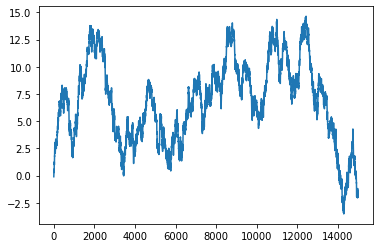

In [9]:
plt.plot(magnetization_array)

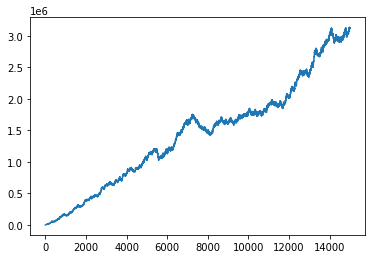

In [10]:
plt.plot(energy_array)

Now we want to introduce the actual simulation of the multigrid algorithm. In general we want to coarsen or fine our grid, to shorten our calculations:

If we want to make our grid more coarse, we just use every 2nd grid point:

\begin{equation}
    u_i^{(2a)}=u_{2i}^{(a)} \text{with i } \in \left[0, ..., N/2 \right] 
\end{equation}

Making our grid finer again is a bit more complicated, but in general we just make an interpolation:

\begin{equation}
    I^{(a)}_{(2a)} u^{(2a)}=\left\{
        \begin{array}{ll}
		u^{(2a)}_{i/2} ,&  i \in \left[0, 2, ..., N \right]  \\
		\left[u^{(2a)}_{(i+1)/2}+u^{(2a)}_{(i-1)/2}\right]/2 ,& i \in \left[1, 3, ..., N-1 \right]
		\end{array}
        \right.
\end{equation}

Untill now, we have neglected the external field (or pretended it is 0). Now we can write the new Hamiltonian as:

\begin{equation}
    H_a=\frac{1}{a}\sum_{i=1}^N(u_i-u_{i-1})^2+a\sum_{i=1}^{N-1}\Phi_i^{a}u_i
\end{equation}

The prolongation can be expressed as:

\begin{equation}
    u^{(a)}=\tilde{u}^{(a)}+I^{(a)}_{(2a)}u^{(2a)}
\end{equation}

The hamiltonian for a one step coarser leads to:

\begin{equation}
    H_{a}=H_{a}(\tilde{u})+H_{2a}(u^{(2a)})
\end{equation}

With

\begin{equation}
    H_{2a}(u^{(2a)})=\frac{1}{2a}\sum_{i=1}^{N/2}(u_i^{(2a)}-u_{i-1}^{(2a)})^2+2a\sum_{i=1}^{N/2-1}\Phi_i^{2a}u_i^{(2a)}
\end{equation}


In [31]:
def coarsen(array):
    coarsen_array=[]
    for i in range(len(array)):
        if i%2==0:
            coarsen_array.append(array[i])
    return coarsen_array

def interpolate(array):
    interpolated_array=[]
    for i in range(2*len(array)):
        if i%2==1:
            interpolated_array.append(array[int(i/2)])
        else: 
            interpolated_array.append((array[int((i+1)/2)]+array[int((i-1)/2)])/2)
    return interpolated_array

print(interpolate(np.arange(1, 65, 2)))

[1.0, 1, 2.0, 3, 4.0, 5, 6.0, 7, 8.0, 9, 10.0, 11, 12.0, 13, 14.0, 15, 16.0, 17, 18.0, 19, 20.0, 21, 22.0, 23, 24.0, 25, 26.0, 27, 28.0, 29, 30.0, 31, 32.0, 33, 34.0, 35, 36.0, 37, 38.0, 39, 40.0, 41, 42.0, 43, 44.0, 45, 46.0, 47, 48.0, 49, 50.0, 51, 52.0, 53, 54.0, 55, 56.0, 57, 58.0, 59, 60.0, 61, 62.0, 63]


## 3: Give the explicit form of $\Phi^{(2a)}$: how does the coarse-level external field $\Phi^{(2a)}$ depend on the fine-level fields ? Implement the restriction and prolongation functions.

We know the contribution of the external field is given as:

\begin{equation}
    \sum_i (\tilde{u}_i^{(a)}+[Iu^{(2a)}]_i)\Phi_i^{(a)}=  \sum_i \tilde{u}_i^{(a)} \Phi_i^{(a)} + \sum_i [Iu^{(2a)}]_i  \Phi_i^{(a)}
\end{equation}

In this equation the second part gives the contribution, that we are looking for. The contribution that can be attributed to the coarse field can be expresses as:

\begin{equation}
    a \sum_i^{N/2-1} u_i^{(2a)} \Phi_{2i}^{(a)} + \frac{a}{2} \sum_i^{N/2-1} (u_i^{(2a)} + u_{i+1}^{(2a)}) \Phi_{2i+1}^{(a)}
\end{equation}

Shifting the index of this equation finally gives us:

\begin{equation}
    2a \sum_i^{N/2-1} u_i^{(2a)} \frac{\Phi_{2i-1}^{(a)} +2\Phi_{2i}^{(a)} +\Phi_{2i+1}^{(a)} }{4}
\end{equation}

Comparing that to the equation above gives us:
\begin{equation}
    2a\sum_{i=1}^{N/2-1}\Phi_i^{2a}u_i^{(2a)}=2a \sum_i^{N/2-1} u_i^{(2a)} \frac{\Phi_{2i-1}^{(a)} +2\Phi_{2i}^{(a)} +\Phi_{2i+1}^{(a)} }{4}
\end{equation}

And therefore:

\begin{equation}
    \frac{\Phi_{2i-1}^{(a)} +2\Phi_{2i}^{(a)} +\Phi_{2i+1}^{(a)} }{4}= \Phi_i^{2a}
\end{equation}


In [ ]:
Now we can look at the multigrid algorithm.

## 4: Implement the above multigrid algorithm for $n_{level}$ levels and number of cycles $\gamma$